<a href="https://colab.research.google.com/github/isidora-rojas/SIO175_DataAnalysis/blob/main/Module_1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- SETUP: DATA LOADING ---
# This cell checks if you are running on Google Colab.
# If yes, it clones the course repository so you have the data files.

import sys
import os

if 'google.colab' in sys.modules:
    # 1. Clone the repository (if not already there)
    repo_name = 'SIO175_DataAnalysis'
    if not os.path.exists(repo_name):
        !git clone https://github.com/isidora-rojas/SIO175_DataAnalysis.git

    # 2. Navigate to the Module 1 folder where the notebook and data reside
    # Note: We must change directory to the specific module folder!
    target_dir = os.path.join(repo_name, 'Module_1')
    if os.path.exists(target_dir):
        os.chdir(target_dir)
        print(f"Working directory changed to: {os.getcwd()}")
    else:
        print("Error: Module directory not found.")

print("Setup Complete! Data files are now available.")

Cloning into 'SIO175_DataAnalysis'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 68 (delta 27), reused 47 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 8.97 MiB | 10.19 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Working directory changed to: /content/SIO175_DataAnalysis/Module_1
Setup Complete! Data files are now available.


# Assignment 1 - Scripps Pier Temperature

In [4]:
# libraries i used for this assignment
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load data
data = loadmat('data/SIO_TEMP_Fixed.mat', squeeze_me=True)
print(data.keys()) # inspect file
# extract variables
T = data['T']
yr = data['yr']
mo = data['mo']
day = data['dy']

# create pandas dataframe to organize data for easier handling
df = pd.DataFrame({
    'year': yr,
     'month' : mo,
     'day':day,
     'T': T}
)
df['date'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('date') # combine yr,mo,day and make it into the index
df

dict_keys(['__header__', '__version__', '__globals__', 'T', 'dy', 'mo', 'None', 'yr', '__function_workspace__'])


,year,month,day,T
date,,,,
1917-01-01,1917,1,1,11.50
1917-01-02,1917,1,2,11.50
1917-01-03,1917,1,3,11.90
1917-01-04,1917,1,4,11.50
1917-01-05,1917,1,5,11.70
...,...,...,...,...
2023-12-27,2023,12,27,17.10
2023-12-28,2023,12,28,17.10
2023-12-29,2023,12,29,16.90


#### **Figure 1**: Plot of SIO temperature with extreme high (>99%) and low (<1%) values indicated

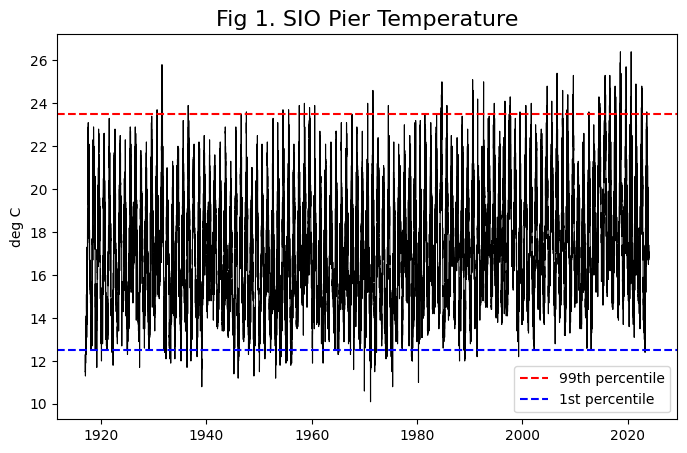

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
# plot full time series
plt.plot(df.index, df['T'], 'k', linewidth=0.8)

# percentiles
p99 = np.percentile(T,99)
p01 = np.percentile(T, 1)
plt.axhline(p99, color='r',  linestyle='--', label='99th percentile')
plt.axhline(p01, color='b', linestyle='--', label='1st percentile')

# labelling/plotting code
plt.ylabel('deg C')
plt.title('Fig 1. SIO Pier Temperature', fontsize=16)
plt.legend()

# Display figure
plt.show()

#### **Figure 2**: Histogram of year of high values

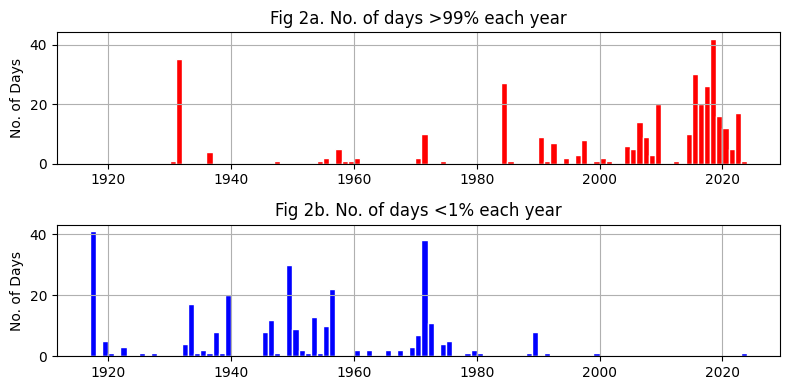

In [7]:
hot_yr = df[df['T'] > p99]['year'] # years that have T's > 99th percentile
cold_yr = df[df['T'] < p01]['year']


fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,4))

# 2a: years with hot days
ax1.hist(hot_yr, bins=range(1917,2025),facecolor='r', edgecolor='w')
ax1.set_ylabel('No. of Days')
ax1.set_title('Fig 2a. No. of days >99% each year')
ax1.grid(True)

# 2b: years with cold days
ax2.hist(cold_yr, bins=range(1917,2025),facecolor='b', edgecolor='w')
ax2.set_ylabel('No. of Days')
ax2.set_title('Fig 2b. No. of days <1% each year')
ax2.grid(True)

plt.tight_layout()
plt.show()



#### **Figure 3:** Histogram of month of high values

Text(0.5, 0, 'month')

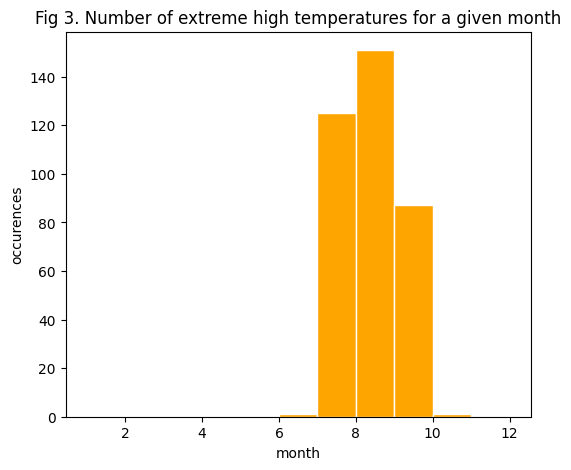

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

hot_mo = df[df['T']>p99]['month']
ax.hist(hot_mo, bins=range(1,13,1), edgecolor='w', facecolor='orange')
ax.set_title('Fig 3. Number of extreme high temperatures for a given month')
ax.set_ylabel('occurences')
ax.set_xlabel('month')


#### **Figure 4:** Histograms on JAS summer temperature during first 30 and last 30 years

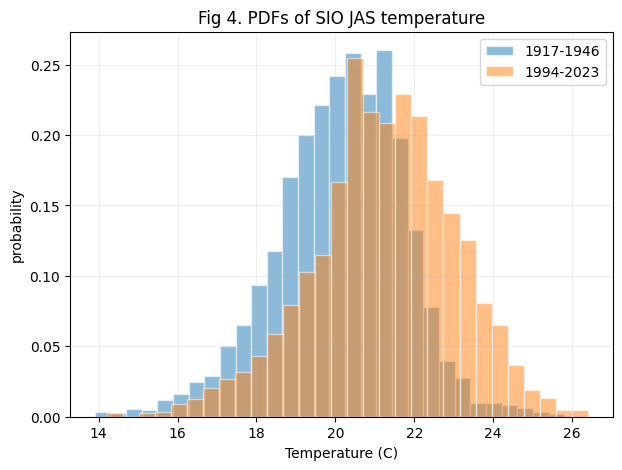

In [9]:
# df with just JAS
JAS = df[(df['month'] < 10) & (df['month'] > 6)]

mask_f30 = JAS['year'].min()+30 # min year plus 30
mask_l30 = JAS['year'].max() - 30 # max year minus 30
# df's with first 30 years and last 30 years
first30 = JAS[JAS['year'] < mask_f30]
last30 = JAS[JAS['year'] > mask_l30]

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.hist(first30['T'], bins=30, density=True, alpha=0.5, label='1917-1946', edgecolor='w')
ax.hist(last30['T'], bins=30, density=True, alpha=0.5, label='1994-2023', edgecolor='w')

ax.set_ylabel('probability')
ax.set_xlabel('Temperature (C)')
ax.set_title('Fig 4. PDFs of SIO JAS temperature')
ax.legend()
ax.grid(True, alpha = 0.2)
plt.show()


#### **Figure 5**: JAS summer temperatures during 2022, with 5th, 50th, and 95th percentiles

/tmp/ipython-input-802413568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JAS['day_of_JAS'] = JAS.groupby('year').cumcount()


Text(0.5, 1.0, 'Fig 5. 2022 Summer Temp \n Climatology for a given day')

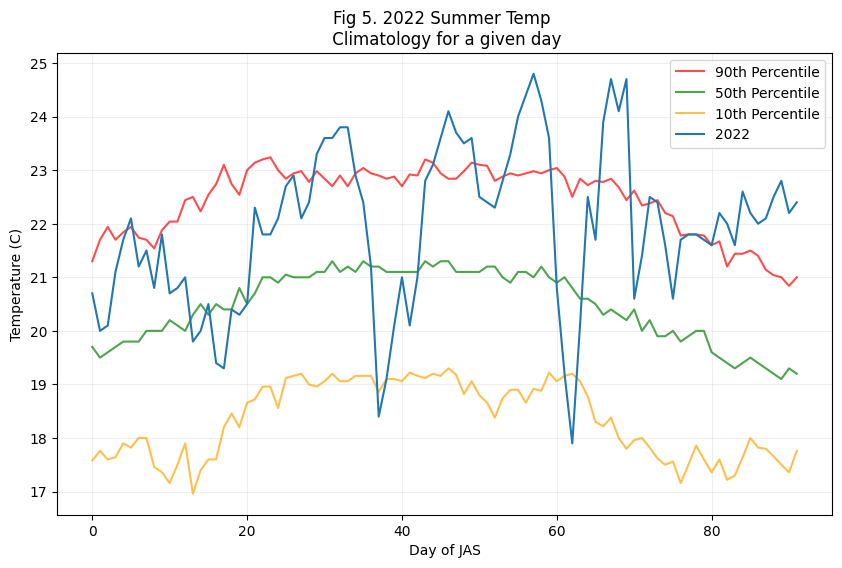

In [10]:
# this creates a day of season counter from 0 to 91
JAS['day_of_JAS'] = JAS.groupby('year').cumcount()
# group the day counter and compute percentiles
daily_stats = JAS.groupby('day_of_JAS')['T'].quantile([0.10,0.50,0.90]).unstack()
# extract 2022
df_2022 = JAS[JAS['year'] == 2022]

fig, ax = plt.subplots(figsize=(10,6))
# plot percentiles
ax.plot(daily_stats.index, daily_stats[0.90], label='90th Percentile', color='red', alpha=0.7)
ax.plot(daily_stats.index, daily_stats[0.50], label='50th Percentile', color='green', alpha=0.7)
ax.plot(daily_stats.index, daily_stats[0.10], label='10th Percentile', color='orange', alpha=0.7)
# 2022 data
ax.plot(df_2022['day_of_JAS'], df_2022['T'], label = '2022', linewidth=1.5)

ax.grid(True, alpha=0.2)
ax.legend()
ax.set_xlabel('Day of JAS')
ax.set_ylabel('Temperature (C)')
ax.set_title('Fig 5. 2022 Summer Temp \n Climatology for a given day')



#### **Figure 6:** Number of JAS days above the 95th percentile

/tmp/ipython-input-3885333124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JAS['threshold_95'] = JAS['day_of_JAS'].map(daily_95)
/tmp/ipython-input-3885333124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JAS['is_MHW'] = JAS['T'] > JAS['threshold_95']


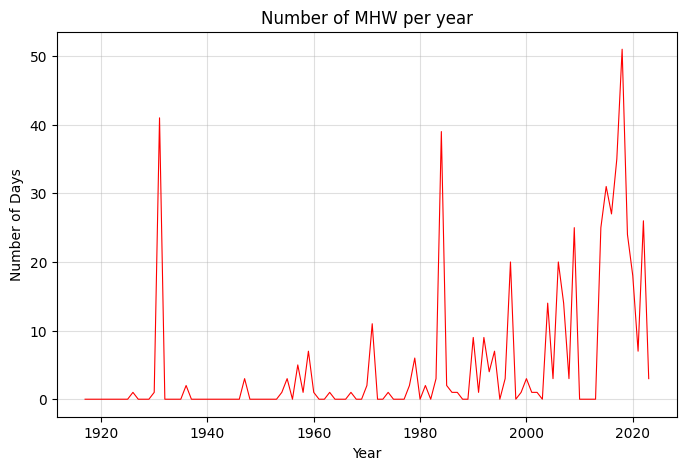

In [11]:
# compute 95th percentile for each day of the season
daily_95 = JAS.groupby('day_of_JAS')['T'].quantile(0.95)

# add a column that tells us the cutoff for each day
JAS['threshold_95'] = JAS['day_of_JAS'].map(daily_95)

# decide whether MHW or not
JAS['is_MHW'] = JAS['T'] > JAS['threshold_95']


num_of_mhw = JAS.groupby('year')['is_MHW'].sum()

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(num_of_mhw.index, num_of_mhw.values, color='r', linewidth=0.8)

ax.set_title('Number of MHW per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Days')
ax.grid(True, alpha = 0.4)


#### **Figure 7:** Time series plot of mean JAS temperature and heat wave days

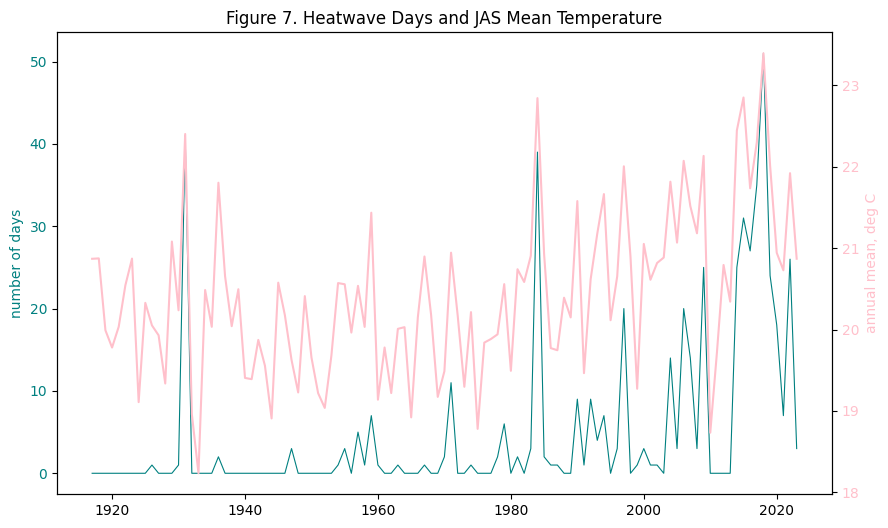

In [12]:
#Compute the mean JAS temperature for each year and plot this as a time series.
#Use plotyy (Figure 7) and scatter (Figure 8) to compare number of heatwave
#days and the mean JAS temperature.

# compute mean
avg_df = JAS.groupby('year').mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(num_of_mhw.index, num_of_mhw.values, color='teal', linewidth=0.8)
ax.set_ylabel('number of days', color='teal')
ax.tick_params(axis='y', labelcolor='teal')

ax2 = ax.twinx()
ax2.plot(avg_df.index, avg_df['T'], 'pink')
ax2.set_ylabel('annual mean, deg C', color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

plt.title('Figure 7. Heatwave Days and JAS Mean Temperature')
plt.show()


#### **Figure 8:** Scatter plot of mean JAS temperature vs heat wave days

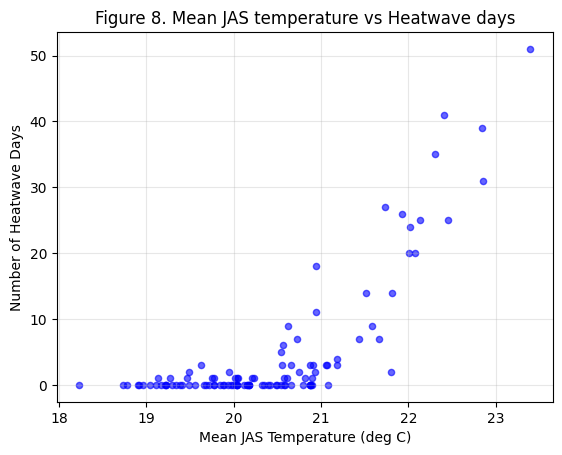

In [13]:
fig, ax = plt.subplots()

ax.scatter(avg_df['T'], num_of_mhw, s=20, c='blue', alpha = 0.6)

ax.set_xlabel('Mean JAS Temperature (deg C)')
ax.set_ylabel('Number of Heatwave Days')
ax.set_title('Figure 8. Mean JAS temperature vs Heatwave days')
ax.grid(True, alpha=0.3)